In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

# Загружаем данные из формата parquet
X_train = pd.read_parquet('data/X_train.parquet')
X_test = pd.read_parquet('data/X_test.parquet')
y_train = pd.read_parquet('data/y_train.parquet')
y_test = pd.read_parquet('data/y_test.parquet')


In [5]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Compute classification metrics for Logistic Regression
classification_metrics_logreg = classification_report(y_test, y_pred_logreg)
print("Metrics for Logistic Regression:")
print(classification_metrics_logreg)


Metrics for Logistic Regression:
              precision    recall  f1-score   support

       False       0.54      0.43      0.48       189
        True       0.53      0.64      0.58       189

    accuracy                           0.53       378
   macro avg       0.54      0.53      0.53       378
weighted avg       0.54      0.53      0.53       378


C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Обучите модель RandomForestClassifier
dt_regressor = RandomForestClassifier()
dt_regressor.fit(X_train, y_train)
# Сделайте предсказания на тестовом наборе
y_pred_dt = dt_regressor.predict(X_test)
# Вычислите метрики для RandomForestClassifier
classification_metrics = classification_report(y_test, y_pred_dt)

print("Metrics for RandomForestClassifier:")
print(classification_metrics)
print("\n")

C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Metrics for RandomForestClassifier:
              precision    recall  f1-score   support

       False       0.63      0.62      0.62       189
        True       0.62      0.63      0.63       189

    accuracy                           0.62       378
   macro avg       0.62      0.62      0.62       378
weighted avg       0.62      0.62      0.62       378


Metrics for XGBoost:
              precision    recall  f1-score   support

       False       0.61      0.61      0.61       189
        True       0.61      0.60      0.61       189

    accuracy                           0.61       378
   macro avg       0.61      0.61      0.61       378
weighted avg       0.61      0.61      0.61       378


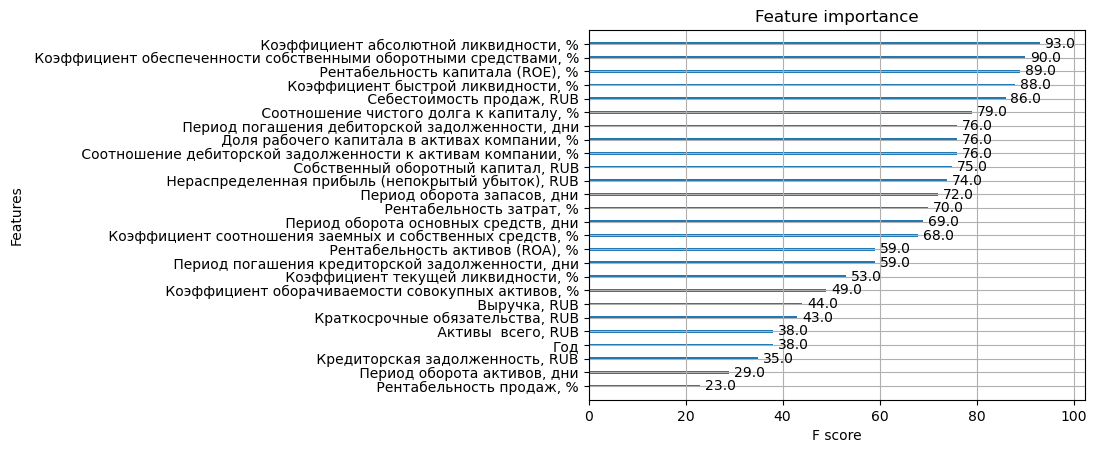

In [2]:


xgb_params = {
    "max_depth": 5,
    "n_estimators": 1100,
    "learning_rate": 0.0965746078281294,
    "subsample": 1,
    "gamma": 0.4124196272598232,
    "min_child_weight": 0.33468400050527614,
    "max_delta_step": 0.7973068260558458,
    "colsample_bytree": 0.6701472435944006,
    "reg_alpha": 0.9978907806518094,
    "reg_lambda": 0.61747493495669,
    "scale_pos_weight": 0.9587691256695492
}

# Обучите модель XGBClassifier
xgb_regressor = xgb.XGBClassifier(**xgb_params, tree_method="gpu_hist")
xgb_regressor.fit(X_train, y_train)

# Сделайте предсказания на тестовом наборе
y_pred_xgb = xgb_regressor.predict(X_test)

# Вычислите метрики для XGBClassifier
classification_metrics = clas   sification_report(y_test, y_pred_xgb)

print("Metrics for XGBoost:")
print(classification_metrics)

# Plot feature importance
xgb.plot_importance(xgb_regressor)
plt.show()


In [6]:
# Преобразование в одномерный массив
y_test_1d = y_test.values.ravel()

# Создание датафрейма с предсказанными и фактическими значениями и значениями из X_test
df_predictions = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_xgb})
df_predictions = pd.concat([df_predictions, pd.DataFrame(X_test)], axis=1)
df_predictions

,Actual,Predicted,Год,"Cooтношение дебиторской задолженности к активам компании, %","Активы всего, RUB","Выручка, RUB","Доля рабочего капитала в активах компании, %","Коэффициент абсолютной ликвидности, %","Коэффициент быстрой ликвидности, %","Коэффициент обеспеченности собственными оборотными средствами, %",...,"Период оборота основных средств, дни","Период погашения дебиторской задолженности, дни","Период погашения кредиторской задолженности, дни","Рентабельность активов (ROA), %","Рентабельность затрат, %","Рентабельность капитала (ROE), %","Рентабельность продаж, %","Себестоимость продаж, RUB","Собственный оборотный капитал, RUB","Соотношение чистого долга к капиталу, %"
0,True,1,2013,0.2715,2.954567e+09,1.429530e+09,0.6286,0.1054,1.7145,-0.0282,...,9.4,261.0,77.73,0.0727,0.2560,1.5757,0.2038,1.138130e+09,1.705812e+09,2.2588
1,False,0,2015,0.1629,1.858970e+09,1.544000e+07,-0.6735,0.0045,0.2835,-2.0581,...,22506.9,6992.0,39330.01,0.0004,0.0877,-0.4027,0.0806,1.385600e+07,-1.474518e+09,1.5330
2,False,0,2013,0.1462,6.095986e+09,2.563564e+09,-0.3288,0.0791,0.2535,-0.6401,...,17.9,124.0,37.13,0.1475,0.0082,1.1215,0.0082,2.542614e+09,-2.145007e+09,-0.2672
3,True,0,2013,0.0168,9.035940e+08,3.120300e+08,0.5298,1.6215,1.7733,0.5327,...,12.4,26.0,570.30,-0.0128,-0.1143,-0.0247,-0.1290,2.904880e+08,-1.948900e+08,-0.0727
4,False,1,2015,0.3353,6.362760e+08,7.116190e+08,-0.0488,0.2048,0.5890,-0.0826,...,31.3,123.0,340.23,0.0087,0.0146,0.2363,0.0144,7.013500e+08,-1.533100e+08,0.8001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,True,0,2019,0.8981,2.306000e+06,2.080430e+08,0.0156,0.0687,1.0159,0.0156,...,2.3,12.0,36.74,0.0014,0.0019,0.0411,0.0019,1.747810e+08,-4.300000e+04,-4.3333
374,True,0,2018,0.5811,9.751210e+08,7.055930e+08,-0.1011,0.1982,0.8193,-0.1143,...,30.1,174.0,319.08,0.0538,0.0602,3.3811,0.0568,6.522110e+08,-1.547070e+08,-11.5510
375,True,1,2018,0.6474,1.870750e+08,1.747770e+08,0.0922,0.0010,0.8408,0.0970,...,62.2,311.0,367.05,0.0153,0.0175,0.0782,0.0172,1.661040e+08,1.703200e+07,-0.0029
376,False,0,2019,0.1742,9.321250e+08,5.056280e+08,0.0896,0.5985,0.8459,-0.1904,...,108.7,132.0,293.20,0.0024,0.0097,0.0511,0.0096,5.007920e+08,3.839800e+07,-3.6267


In [8]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
y_train_gbm = y_train.astype(int)
y_test_gbm = y_test.astype(int)
X_train_gbm = X_train
X_test_gbm = X_test
# Переименовать столбцы, заменяя запрещенные символы на разрешенные
X_train_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_train.columns]
X_test_gbm.columns = ["".join(c if c.isalnum() or c in {'_', '.'} else '_' for c in str(x)) for x in X_test.columns]

# Create an instance of the LGBMClassifier
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',  # Metric for binary classification
}

lgbm_classifier = LGBMClassifier(**lgbm_params)

# Train the classifier on the training data
lgbm_classifier.fit(X_train_gbm, y_train_gbm, eval_metric='auc', eval_set=[(X_test_gbm, y_test_gbm)])

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test_gbm)

# Compute classification metrics for LightGBM
classification_metrics_lgbm = classification_report(y_test_gbm, y_pred_lgbm)
print("Metrics for LightGBM:")
print(classification_metrics_lgbm)



C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 441, number of negative: 441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6387
[LightGBM] [Info] Number of data points in the train set: 882, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Metrics for LightGBM:
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       189
           1       0.56      0.55      0.55       189

    accuracy                           0.56       378
   macro avg       0.56      0.56      0.56       378
weighted avg       0.56      0.56      0.56       378


In [9]:
y_train_gbm

,Категориальная переменная
0,0
1,0
2,1
3,1
4,1
...,...
877,1
878,0
879,0
880,1


In [6]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import classification_report

# Создайте объект классификатора CatBoost
catboost_params = {
    'loss_function': 'Logloss',  # Функция потерь для бинарной классификации
    'eval_metric': 'BalancedAccuracy',  # Метрика оценки качества
    'random_seed': 42,  # Зафиксируйте случайность для воспроизводимости
}

catboost_classifier = CatBoostClassifier(task_type='GPU',**catboost_params)

# Обучите классификатор на тренировочных данных
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

# Сделайте предсказания на тестовом наборе
y_pred_catboost = catboost_classifier.predict(X_test)

# Convert the labels in y_pred_catboost to bool type
y_pred_catboost = y_pred_catboost.astype(bool)

# Вычислите метрики для CatBoostClassifier
classification_metrics_catboost = classification_report(y_test, y_pred_catboost)

print("Metrics for CatBoost:")
print(classification_metrics_catboost)
# Выведите важность признаков
feature_importance = catboost_classifier.get_feature_importance(prettified=True)
print("Feature Importance for CatBoost:")
print(feature_importance)


Learning rate set to 0.071971
0:	learn: 0.6836639	test: 0.6891757	best: 0.6891757 (0)	total: 84ms	remaining: 1m 23s
1:	learn: 0.6738666	test: 0.6858876	best: 0.6858876 (1)	total: 151ms	remaining: 1m 15s
2:	learn: 0.6664805	test: 0.6835979	best: 0.6835979 (2)	total: 231ms	remaining: 1m 16s
3:	learn: 0.6576856	test: 0.6817060	best: 0.6817060 (3)	total: 302ms	remaining: 1m 15s
4:	learn: 0.6489172	test: 0.6806182	best: 0.6806182 (4)	total: 375ms	remaining: 1m 14s
5:	learn: 0.6406848	test: 0.6772329	best: 0.6772329 (5)	total: 427ms	remaining: 1m 10s
6:	learn: 0.6350237	test: 0.6763906	best: 0.6763906 (6)	total: 482ms	remaining: 1m 8s
7:	learn: 0.6282665	test: 0.6742268	best: 0.6742268 (7)	total: 530ms	remaining: 1m 5s
8:	learn: 0.6226252	test: 0.6739360	best: 0.6739360 (8)	total: 593ms	remaining: 1m 5s
9:	learn: 0.6158079	test: 0.6734736	best: 0.6734736 (9)	total: 676ms	remaining: 1m 6s
10:	learn: 0.6106134	test: 0.6730778	best: 0.6730778 (10)	total: 737ms	remaining: 1m 6s
11:	learn: 0.6056

C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\envs\models_checking\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu